In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
%matplotlib inline
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import utils


2025-05-01 13:09:45.518328: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-01 13:09:46.034397: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-01 13:09:46.034450: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-01 13:09:46.142064: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-01 13:09:46.383669: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-01 13:09:46.386523: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

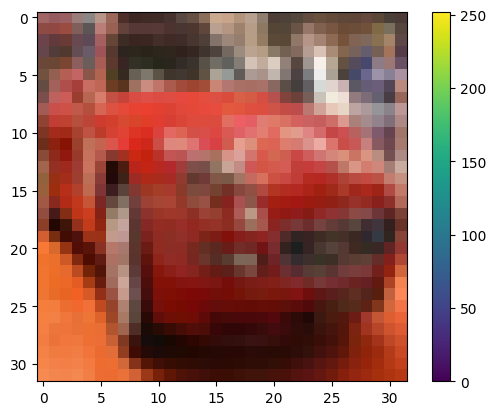

In [4]:
plt.figure()
plt.imshow(x_train[5])
plt.colorbar()
plt.grid(False)

In [5]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [6]:
x_train = x_train/255
x_test = x_test/255

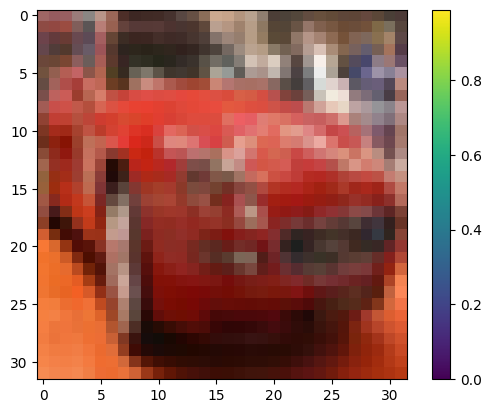

In [7]:
plt.figure()
plt.imshow(x_train[5])
plt.colorbar()
plt.grid(False)

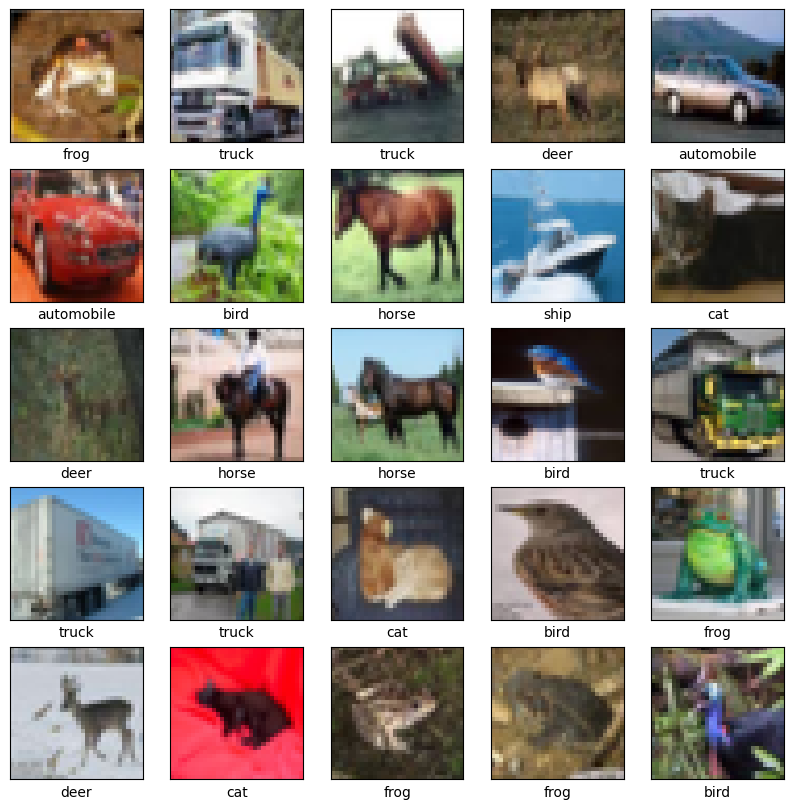

In [8]:
plt.figure(figsize =(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i])
  plt.xlabel(class_names[y_train[i][0]])

In [9]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32, 3)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer=tf.keras.optimizers.SGD(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(x_train, y_train, epochs=15)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 1841162 (7.02 MB)
Trainable params: 1841162 (7.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


2025-05-01 13:09:54.971971: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/15
1563/1563 [==============================] - 15s 9ms/step - loss: 1.8624 - accuracy: 0.3350
Epoch 2/15
1563/1563 [==============================] - 13s 8ms/step - loss: 1.6757 - accuracy: 0.4059
Epoch 3/15
1563/1563 [==============================] - 12s 7ms/step - loss: 1.5938 - accuracy: 0.4368
Epoch 4/15
1563/1563 [==============================] - 12s 8ms/step - loss: 1.5339 - accuracy: 0.4588
Epoch 5/15
1563/1563 [==============================] - 12s 8ms/step - loss: 1.4891 - accuracy: 0.4724
Epoch 6/15
1563/1563 [==============================] - 12s 7ms/step - loss: 1.4468 - accuracy: 0.4875
Epoch 7/15
1563/1563 [==============================] - 11s 7ms/step - loss: 1.4129 - accuracy: 0.5009
Epoch 8/15
1563/1563 [==============================] - 12s 8ms/step - loss: 1.3799 - accuracy: 0.5111
Epoch 9/15
1563/1563 [==============================] - 12s 7ms/step - loss: 1.3512 - accuracy: 0.5248
Epoch 10/15
1563/1563 [==============================] - 11s 7ms/step - l

In [10]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test acc:', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 1.3317 - accuracy: 0.5299
Test loss: 1.3316646814346313
Test acc: 0.5299000144004822


In [11]:
predictions = model.predict(x_train)

  14/1563 [..............................] - ETA: 6s  

2025-05-01 13:12:58.201277: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


1563/1563 [==============================] - 8s 5ms/step


Text(0.5, 0, 'ship')

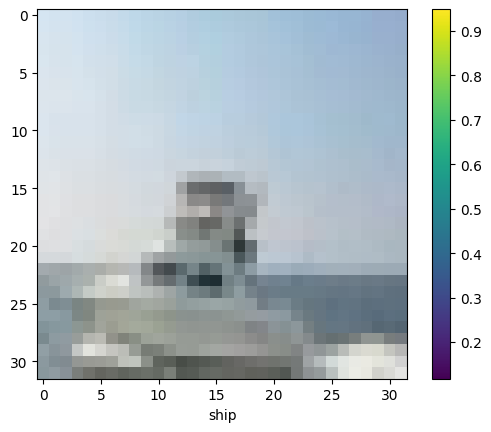

In [12]:
plt.figure()
plt.imshow(x_train[100])
plt.colorbar()
plt.grid(False)
plt.xlabel(class_names[y_train[100][0]])